In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Importamos librerias de arboles de decisiones
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Metricas
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import numpy as np
import matplotliba

In [3]:
data = datasets.load_iris()

In [5]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Preprocesamiento de los datos

In [10]:
x = df[["petal width (cm)"]]
y = df["target"]

## Division de datos

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Creacion del modelo de clasificacion

In [14]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)

clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

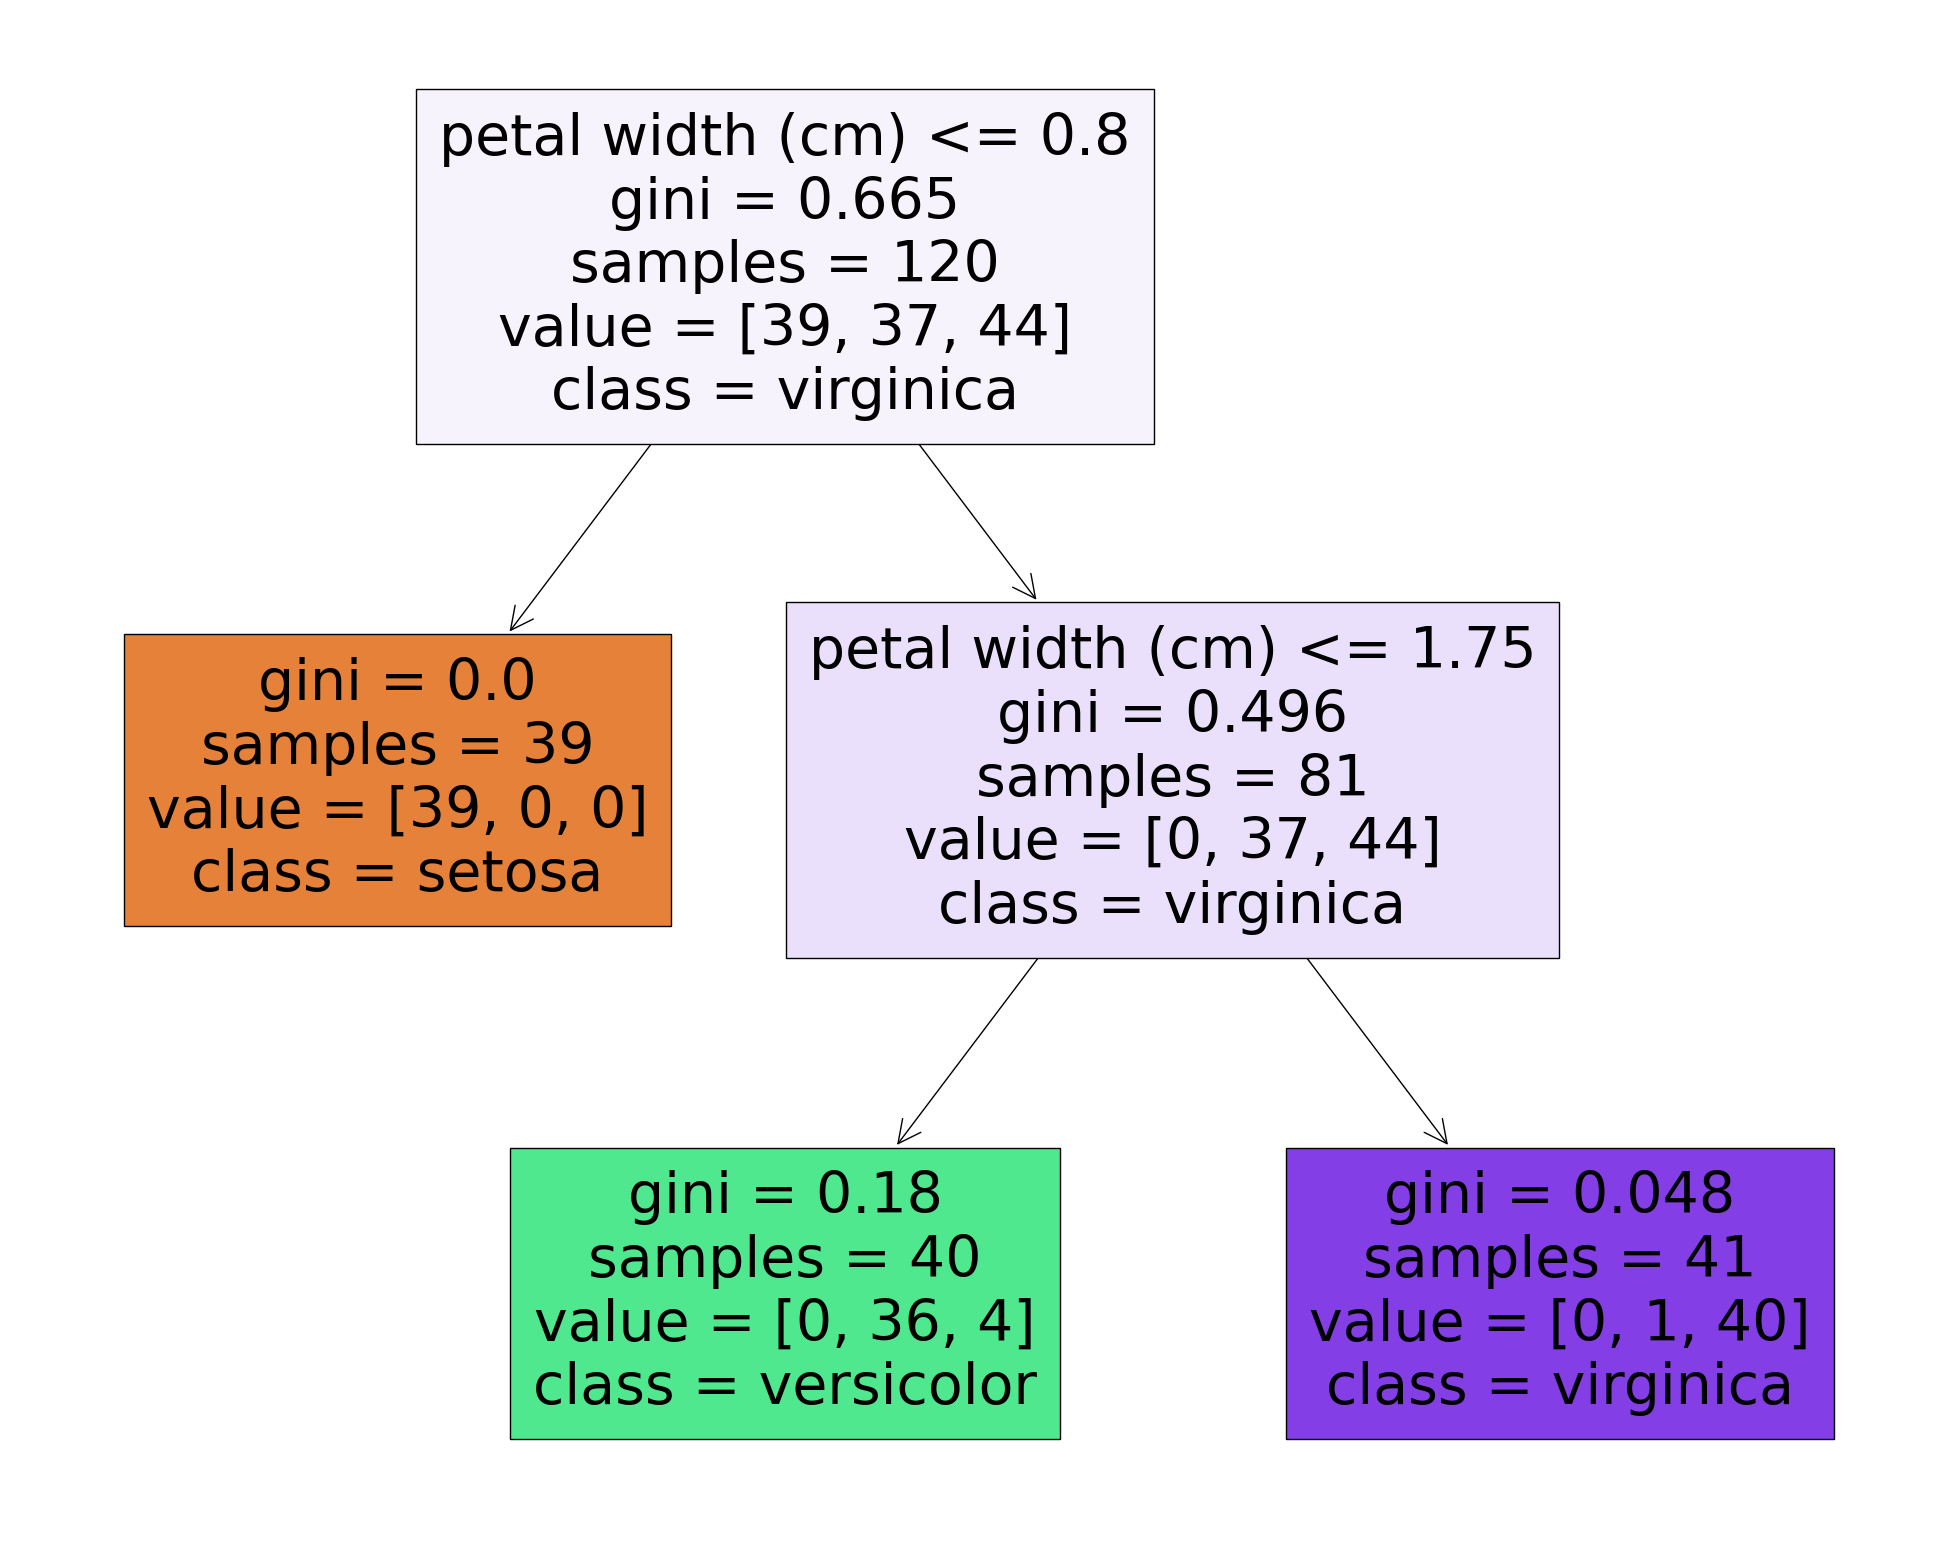

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=x.columns, class_names=data.target_names, filled=True)

In [16]:
y_pred = clf.predict()
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [18]:
df_test = pd.DataFrame(columns=["Valor Real", "Valor Predicho"])
df_test["Valor Real"] = y_test
df_test["Valor Predicho"] = y_pred
df_test

,Valor Real,Valor Predicho
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


## Metricas

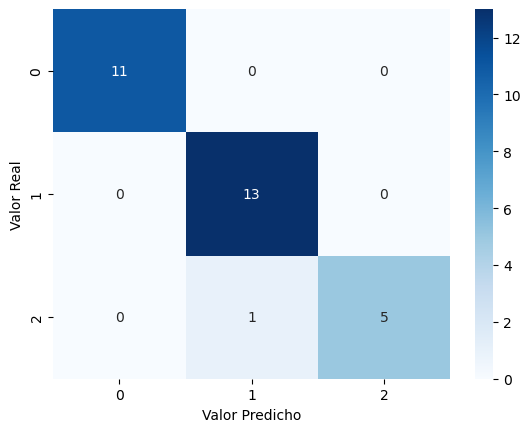

In [27]:
c_matrix = confusion_matrix(y_test, y_pred)

fg = sns.heatmap(c_matrix, cmap="Blues", annot=True)
fg.set_xlabel("Valor Predicho")
fg.set_ylabel("Valor Real")
plt.show()

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

